# 파이토치

- GPU 연산속도를 활용하기 위해
- 내부적으로 cuda, cudnn을 사용함
- axis 0은 행, axis 1은 열


In [1]:
import torch

torch.tensor([[1., -1.], [1., -1.]])

tensor([[ 1., -1.],
        [ 1., -1.]])

- torch.autograd: 자동 미분 패키지
- torch.nn: 신경망 구축 및 훈련 패키지
- torch.multiprocessing: 파이썬 멀티프로세싱 패키지
- torch.utils.DataLoader 및 기타 유틸리티를 제공하는 패키지


In [2]:
temp = torch.FloatTensor([1, 2, 3,4,5,6,7])
print(temp[0])
print(temp[2:-4])

tensor(1.)
tensor([3.])


In [3]:
v = torch.tensor([1, 2, 3, 4, 5, 6])
w = torch.tensor([0, 1, 2, 0, 1, 2])

print(w-v)

tensor([-1, -1, -1, -4, -4, -4])


In [4]:
temp = torch.tensor([[1, 2, 3], [4, 5, 6]])
print(temp.view(3, 2))
print(temp.view(6, 1))
temp2 = temp.view(1, -1)
print(temp2)

tensor([[1, 2],
        [3, 4],
        [5, 6]])
tensor([[1],
        [2],
        [3],
        [4],
        [5],
        [6]])
tensor([[1, 2, 3, 4, 5, 6]])


In [5]:
print(temp.view(-1))

tensor([1, 2, 3, 4, 5, 6])


데이터를 한번에 다 부르지 않고 custon dataset을 만들어서 부르는 방법(배치 단위로)


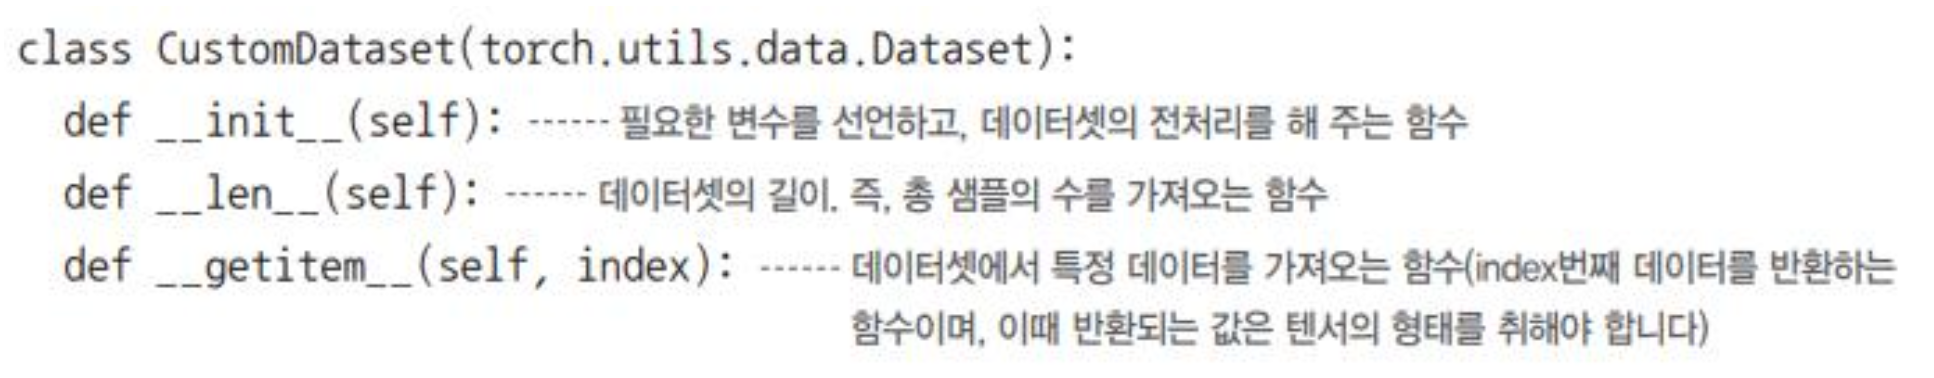


#### 데이터 준비

`torch.utils.data.DataLoader`

- 학습할때 배치 크기 만큼 데이터를 꺼내서 사용
- 반복자에 포함된 인덱스를 이용하여 배치 크기만큼 데이터를 반환

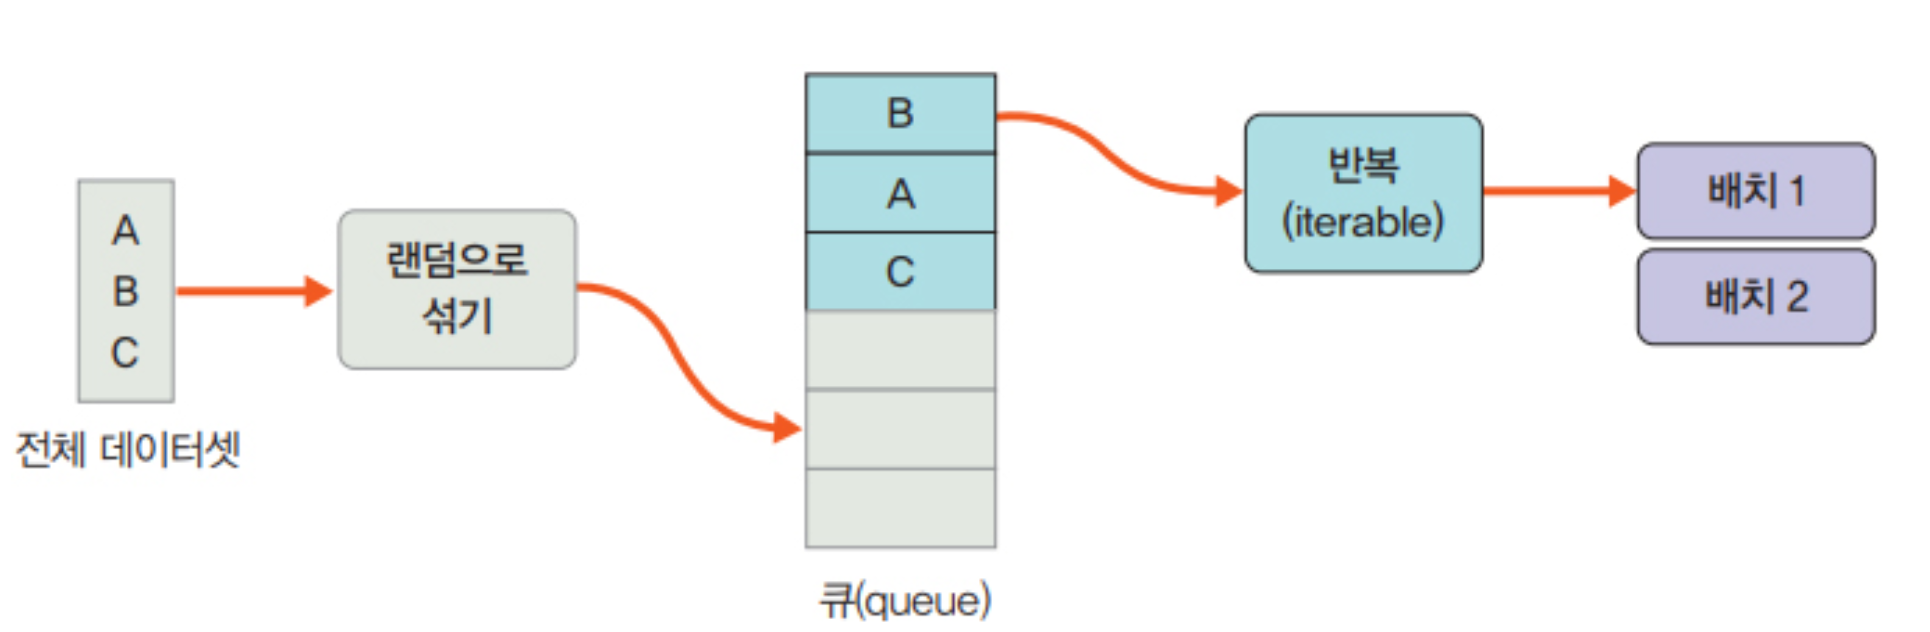


In [6]:
import torchvision.transforms as transforms

mnist_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.1,)) # 평균 0.5, 표준편차 0.1
])

from torchvision.datasets import MNIST
import requests
download_root = '.data'

train_dataset = MNIST(download_root, transform=mnist_transform, train=True, download=True)
test_dataset = MNIST(download_root, transform=mnist_transform, train=False, download=True)
valid_dataset = MNIST(download_root, transform=mnist_transform, train=False, download=True)

/Users/coldbrew/anaconda3/envs/torch_book/lib/python3.9/site-packages/torchvision/io/image.py:14: UserWarning: Failed to load image Python extension: 'dlopen(/Users/coldbrew/anaconda3/envs/torch_book/lib/python3.9/site-packages/torchvision/image.so, 0x0006): Library not loaded: @rpath/libjpeg.9.dylib
  Referenced from: <FB2FD416-6C4D-3621-B677-61F07C02A3C5> /Users/coldbrew/anaconda3/envs/torch_book/lib/python3.9/site-packages/torchvision/image.so
  Reason: tried: '/Users/coldbrew/anaconda3/envs/torch_book/lib/python3.9/site-packages/torchvision/../../../libjpeg.9.dylib' (no such file), '/Users/coldbrew/anaconda3/envs/torch_book/lib/python3.9/site-packages/torchvision/../../../libjpeg.9.dylib' (no such file), '/Users/coldbrew/anaconda3/envs/torch_book/lib/libjpeg.9.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/Users/coldbrew/anaconda3/envs/torch_book/lib/libjpeg.9.dylib' (no such file), '/Users/coldbrew/anaconda3/envs/torch_book/lib/libjpeg.9.dylib' (no such file), '/Syst

# 모델 정의

- 파이토치에서 모델을 정의하기 위해서는 모듈을 상속한 클래스를 사용
- 모델과 모듈이 다른점
  - 계층 : 모듈 또는 모듈을 구성하는 한개의 계층
  - 모듈 : 한개 이상의 계층이 모여서 구성된 것
  - 모델 : nn.Module을 상속한 클래스로 정의

예를 들어

```
import torch.nn as nn
model = nn.Linear(in_features=1, out_features = 1, bias = True)
```


In [7]:
import torch.nn as nn
model = nn.Linear(in_features=1, out_features = 1, bias = True)

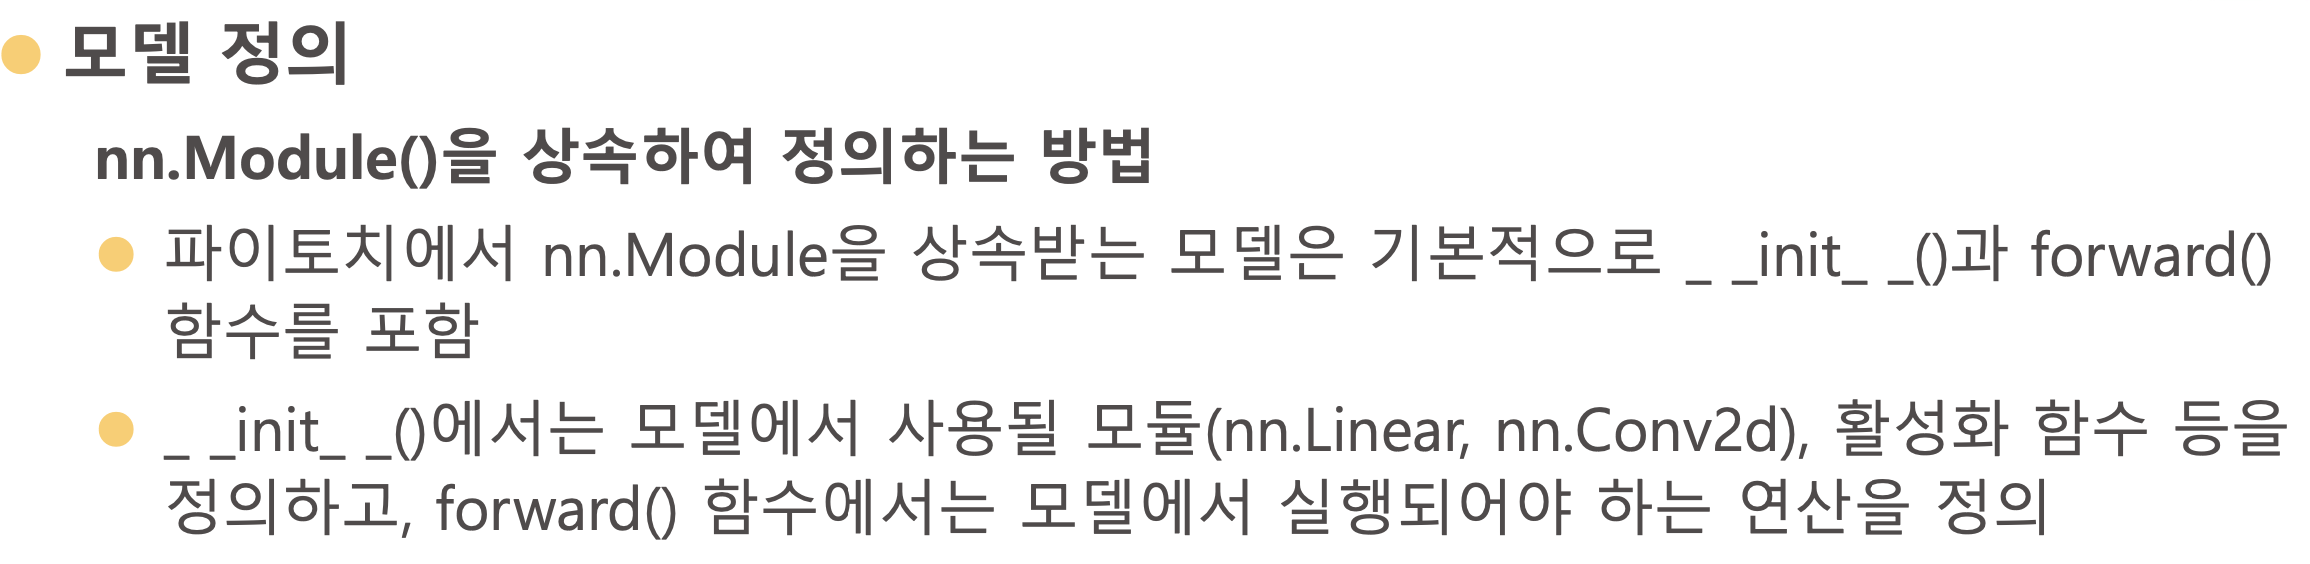


모듈을 정의해 놓음
init이 먼저 작동하고 forward는 모델이 학습될때 사용


In [8]:
class MLP(nn.Module):
    def __init__(self, inputs):
        super(MLP, self).__init__() # 자기 자신에 대한 상속, nn.Module의 속성들을 가지고 초기화
        self.layer = nn.Linear(inputs, 1)
        self.activation = nn.Sigmoid()

    def forward(self, X):
        X = self.layer(X)
        X = self.activation(X)
        return X


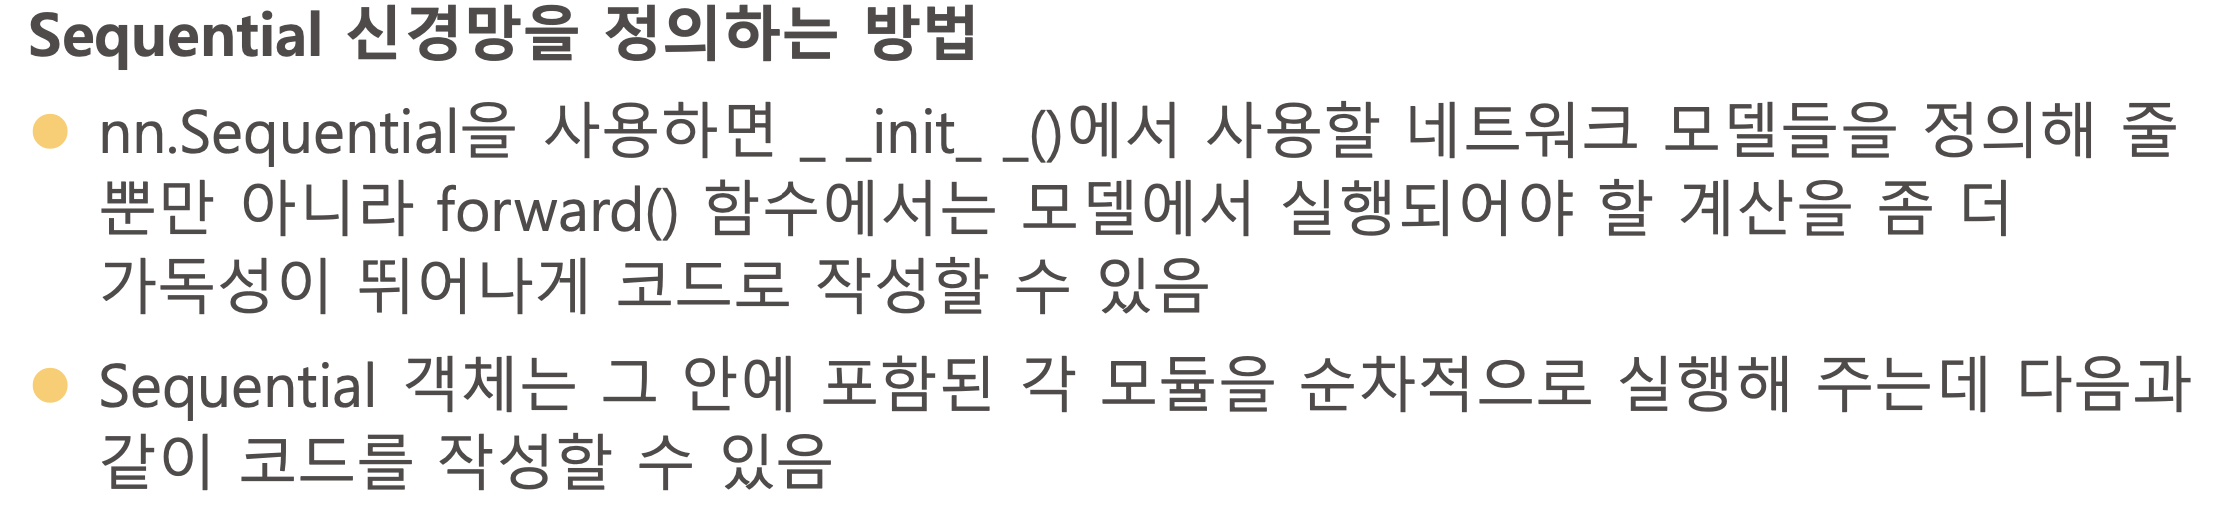


layer안에 네트워크 모델을 정의해줌, forward에서는 실행될 계산을 작성함


In [9]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels= 3, out_channels=64, kernel_size=5),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2)
        )
        self.layer2 = nn.Sequential(
            nn.Conv2d(in_channels= 64, out_channels=30, kernel_size=5),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2)
        )
        self.layer3 = nn.Sequential(
            nn.Linear(in_features= 30*5*5, out_features=10, bias = True), # view로 펼쳐줘서 가능한건가?
            nn.ReLU(inplace=True), # 750 = 30*5*5
        )
    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = x.view(x.shape[0], -1)
        x = self.layer3(x)
        return x
    
model = MLP()

print("-------------------child")
print(list(model.children()))
print("-------------------modules")
print(list(model.modules()))


-------------------child
[Sequential(
  (0): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1))
  (1): ReLU(inplace=True)
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
), Sequential(
  (0): Conv2d(64, 30, kernel_size=(5, 5), stride=(1, 1))
  (1): ReLU(inplace=True)
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
), Sequential(
  (0): Linear(in_features=750, out_features=10, bias=True)
  (1): ReLU(inplace=True)
)]
-------------------modules
[MLP(
  (layer1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(64, 30, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    (0): Linear(in_features=750, out_features=10, bias=True)


### feature map 크기 계산


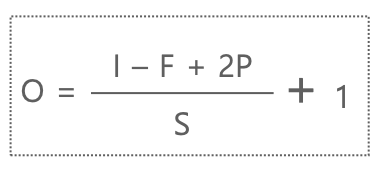


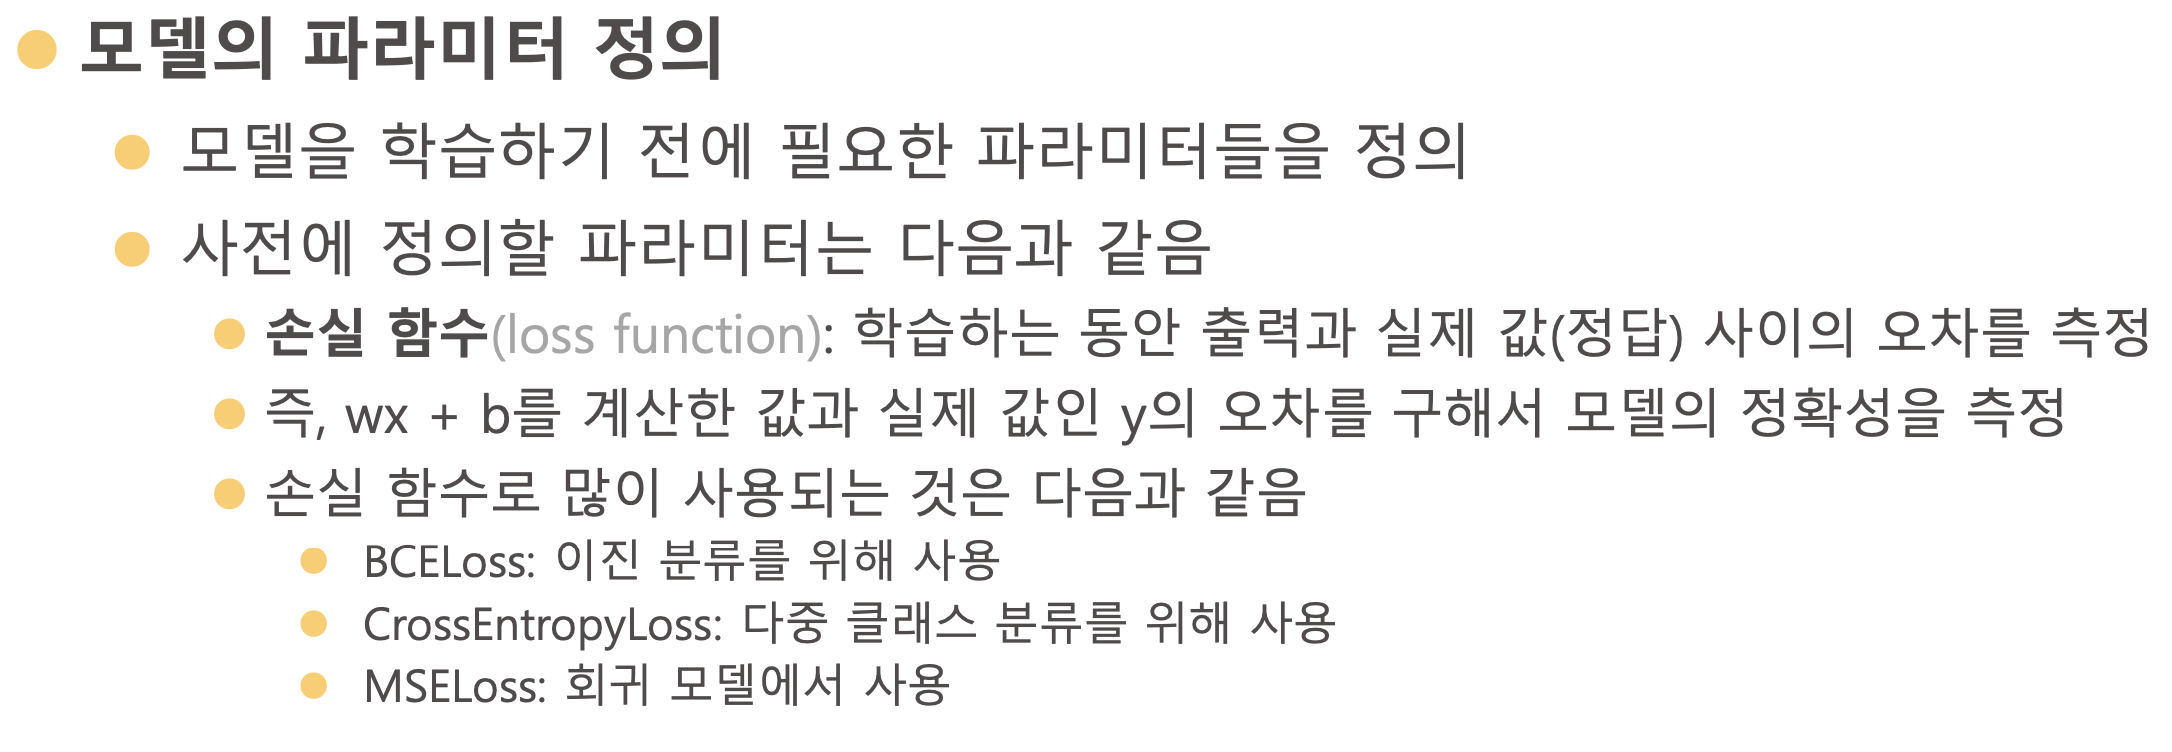


## y = wx + b

- 학습 시키고 싶은게 w
- bias : b
- 정답값 : G
- input : x
- 로스(너비) = (정답값 - 예측값)\*\*2

## Optimizer

- 데이터와 손실 함수를 바탕으로 모델의 업데이트 방법을 결정
- step() 메서드를 통해서 전달받은 파라미터를 업데이트
- torch.optim.Optimizer(params, defaults)
- zero_grad() 메서드는 파라미터의 기울기를 0으로 만듬

## Learning rate scheduler

- 학습률 조절


In [10]:
import torch.optim as optim
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer, lr_lambda=lambda epoch:0.95**epoch)

for epoch in range(1, 100+1):
    for x, y, in dataloder:
        optimizer.zero_grad()
        loss_fn(model(x), y).backward()
        optimizer.step()
    scheduler.step()

NameError: name 'dataloder' is not defined

#### 모델, 손실 함수, 옵티마이저 정의

- optimizer.zero_grad():
- 전방향 학습,

#### 전방향 학습

output = model(input)

#### 손실 함수로 출력과 정답의 차이 계산

loss = loss_fn(output, target)

#### 역전파 학습

loss.backward()

#### 기울기 업데이트

optimizer.step()


In [11]:
import torch
import torchmetrics

preds = torch.randn(10, 5).softmax(dim=-1)
print(preds)

target = torch.randint(5, (10,))
print(target)
acc = torchmetrics.functional.accuracy(preds, target, task="multiclass", num_classes=5)
acc

tensor([[0.1835, 0.0769, 0.1484, 0.4090, 0.1823],
        [0.0219, 0.1087, 0.7235, 0.0318, 0.1141],
        [0.4205, 0.2388, 0.1331, 0.1059, 0.1017],
        [0.1261, 0.0856, 0.5894, 0.0253, 0.1737],
        [0.2436, 0.1395, 0.2211, 0.0455, 0.3504],
        [0.3169, 0.0829, 0.4181, 0.1134, 0.0687],
        [0.1199, 0.2117, 0.1936, 0.4001, 0.0746],
        [0.1454, 0.1326, 0.1931, 0.1965, 0.3325],
        [0.0330, 0.0937, 0.0447, 0.0376, 0.7910],
        [0.3373, 0.0504, 0.0393, 0.5347, 0.0382]])
tensor([0, 2, 0, 1, 0, 1, 0, 4, 3, 2])


tensor(0.3000)

## 처음부터 해보기


In [18]:
import torch
import torch.nn as nn
import torch.optim as optim

from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
import torchvision.transforms as transforms
# 하이퍼 파라미터 세팅

batch_size = 64
epoch = 10
lr = 0.001

# 데이터 로딩
train_dataset = MNIST(download_root, transform=mnist_transform, train=True, download=True)
test_dataset = MNIST(download_root, transform=mnist_transform, train=False, download=True)
valid_dataset = MNIST(download_root, transform=mnist_transform, train=False, download=True)

train_dataset = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
valid_dataset = DataLoader(valid_dataset, batch_size=batch_size, shuffle=True)
test_dataset = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

# 모델
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        ## layer 정의
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10) # 10개의 클래스

    def forward(self, x):
        x = x.view(-1, 28*28) # 2차원짜리를 1차원으로 변환해서 가져올거임
        x = torch.relu(self.fc1(x)) # fc1에 x를 넣고 relu를 적용
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [19]:
model = SimpleNN().to(device="mps")

In [20]:
# 옵티마이저 및 손실함수
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=lr)
optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    weight_decay: 0
)

Epoch 1, Train Loss: 0.0597, Validation Loss: 0.1249
Accuracy: 96.74%


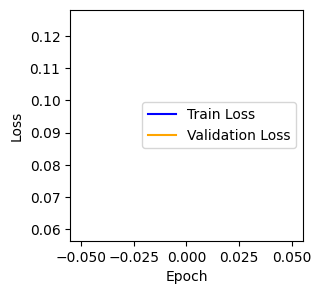

Epoch 2, Train Loss: 0.0564, Validation Loss: 0.1085
Accuracy: 96.97%


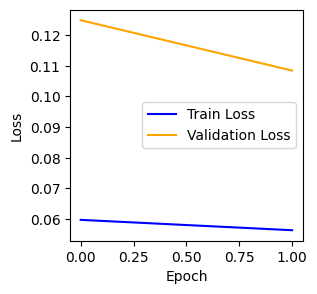

Epoch 3, Train Loss: 0.0519, Validation Loss: 0.1134
Accuracy: 96.96%


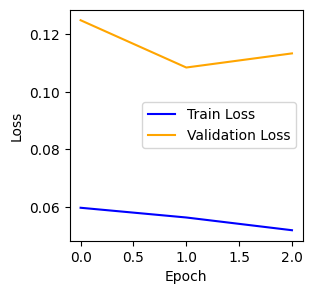

Epoch 4, Train Loss: 0.0535, Validation Loss: 0.1028
Accuracy: 97.28%


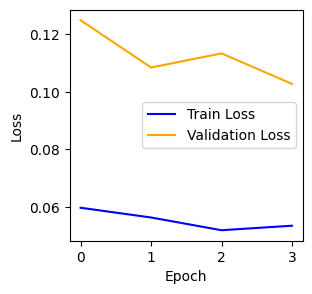

Epoch 5, Train Loss: 0.0484, Validation Loss: 0.1158
Accuracy: 97.13%


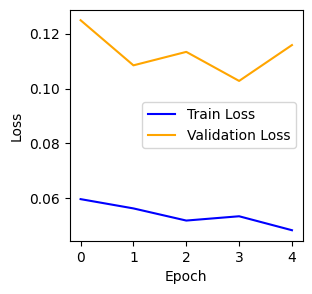

Epoch 6, Train Loss: 0.0490, Validation Loss: 0.1139
Accuracy: 97.29%


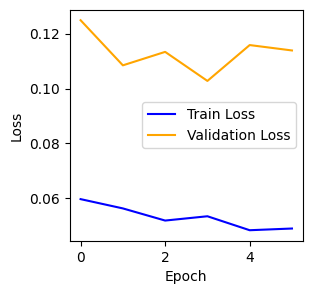

Epoch 7, Train Loss: 0.0418, Validation Loss: 0.1132
Accuracy: 96.77%


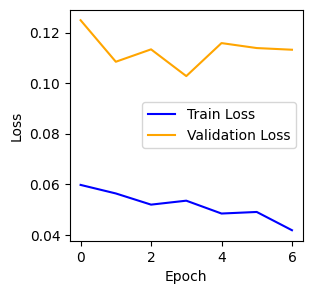

Epoch 8, Train Loss: 0.0440, Validation Loss: 0.1104
Accuracy: 97.44%


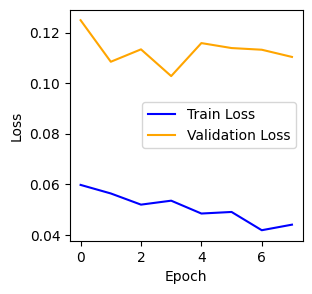

Epoch 9, Train Loss: 0.0434, Validation Loss: 0.1177
Accuracy: 97.10%


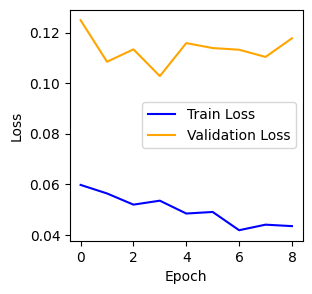

Epoch 10, Train Loss: 0.0417, Validation Loss: 0.1179
Accuracy: 97.16%


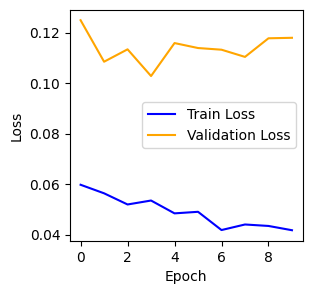

In [ ]:
from matplotlib import pyplot as plt

# 손실 값을 저장할 리스트
train_losses = []
valid_losses = []



for epoch in range(1, epoch + 1):
    model.train()  # 학습 모드 설정
    train_loss_total = 0.0

    # Training 루프
    for images, labels in train_dataset:
        images = images.to(device="mps")
        labels = labels.to(device="mps")
        optimizer.zero_grad()
        preds = model(images)  # 예측
        train_loss = loss_fn(preds, labels)  # 손실 계산
        train_loss.backward()  # 역전파 (Gradient 계산)
        optimizer.step()  # 가중치 업데이트
        train_loss_total += train_loss.item()

    train_loss_avg = train_loss_total / len(train_dataset) 
    train_losses.append(train_loss_avg)

    # Validation 루프
    model.eval()  # 평가 모드 설정
    valid_loss_total = 0.0
    total = 0
    correct = 0

    with torch.no_grad():  # Validation 중에는 그래디언트를 계산하지 않음
        for images, labels in valid_dataset:
            images = images.to(device="mps")
            labels = labels.to(device="mps")
            preds = model(images)
            valid_loss = loss_fn(preds, labels)
            _, preds = torch.max(preds, 1)
            total += labels.size(0)
            correct += (preds == labels).sum().item()
            valid_loss_total += valid_loss.item()

    acc = (correct / total) * 100

    valid_loss_avg = valid_loss_total / len(valid_dataset) 
    valid_losses.append(valid_loss_avg)

    # 결과 출력
    print(f"Epoch {epoch}, Train Loss: {train_loss_avg:.4f}, Validation Loss: {valid_loss_avg:.4f}")
    print(f"Accuracy: {acc:.2f}%")
    # 손실 시각화
    # 그래프 초기화
    plt.figure(figsize=(3, 3))
    plt.plot(train_losses, label="Train Loss", color="blue")
    plt.plot(valid_losses, label="Validation Loss", color="orange")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.pause(0.1)  # 잠깐 멈춰서 그래프 업데이트

In [24]:
# Validation 루프
model.eval()  # 평가 모드 설정
valid_loss_total = 0.0
total = 0
correct = 0

with torch.no_grad():  # Validation 중에는 그래디언트를 계산하지 않음
    for images, labels in test_dataset:
        images = images.to(device="mps")
        labels = labels.to(device="mps")
        preds = model(images)
        valid_loss = loss_fn(preds, labels)
        _, preds = torch.max(preds, 1)
        total += labels.size(0)
        correct += (preds == labels).sum().item()
        

print(f"Accuracy of Test Data: {(correct / total) * 100:.2f}%")

Accuracy of Test Data: 97.16%


# CNN


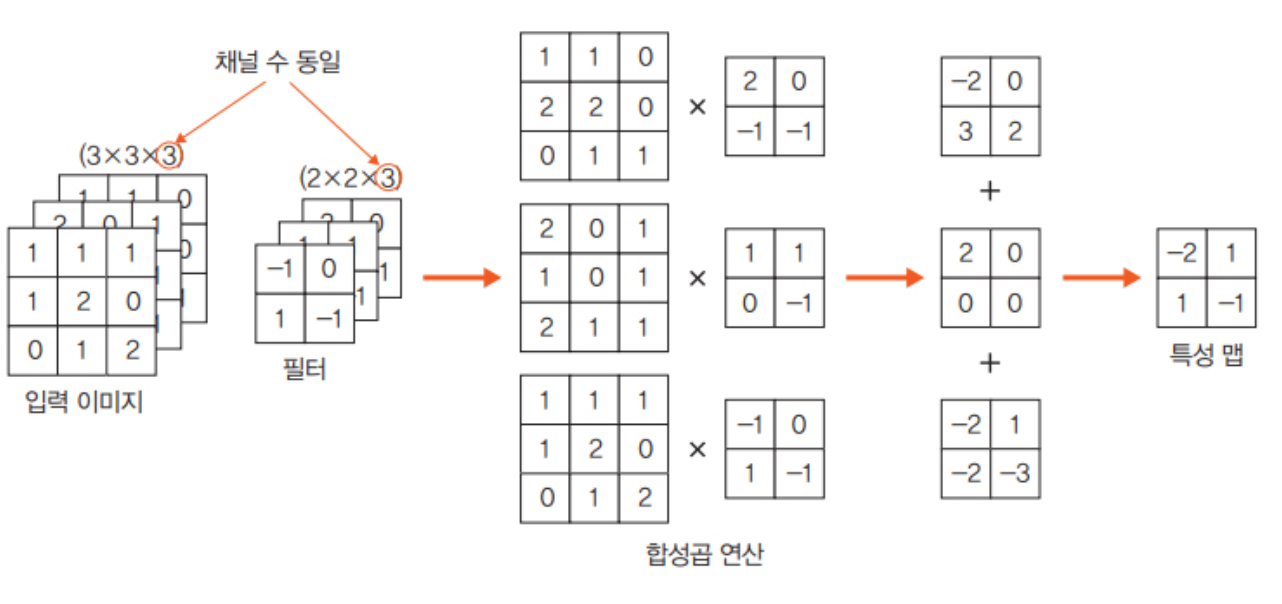


- 하이퍼파라미터
  - 필터 개수 K
  - 필터 크기 F
  - 스트라이드 S
  - 페딩 P
- 출력 데이터
  - W2 = (W-F+2P)/s +1
  - H2 = (H-F+2P)/s +1
  - Depth = K


In [12]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.nn.functional as F

import torchvision
import torchvision.transforms as transforms # 이미지 변환을 위한 모듈
from torch.utils.data import DataLoader, Dataset

device = "mps"
download_root = '.data'
mnist_transform = transforms.Compose([transforms.ToTensor()])
train_dataset = torchvision.datasets.FashionMNIST(download_root, transform=mnist_transform, train=True, download=True)
test_dataset = torchvision.datasets.FashionMNIST(download_root, transform=mnist_transform, train=False, download=True)




In [13]:
train_loader = DataLoader(train_dataset, batch_size=100, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=100, shuffle=True)

In [5]:
class FashionDNN(nn.Module):
    def __init__(self):
        super(FashionDNN, self).__init__()
        self.fc1 = nn.Linear(784, 256)
        self.drop = nn.Dropout(0.2)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 784)
        x = F.relu(self.fc1(x))
        x = self.drop(x)
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

learning_rate = 0.001
model = FashionDNN().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
print(model)



FashionDNN(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (drop): Dropout(p=0.2, inplace=False)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=10, bias=True)
)


In [52]:
num_epochs = 10
count = 0

loss_list = []
iteration_list = []
accuracy_list = []

predictions_list = []
labels_list = []

for epoch in range(num_epochs):
    for images, labels, in train_loader:
        images, labels = images.to(device), labels.to(device)
        train = Variable(images.view(100, 1, 28, 28))
        labels = Variable(labels)

        ouputs = model(train)
        loss = criterion(ouputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        count += 1

        if not (count % 50):
            total = 0
            correct = 0

            for images, labels in test_loader:
                images, labels = images.to(device), labels.to(device)
                test = Variable(images.view(100, 1, 28, 28))

                outputs = model(test)
                predictions = torch.max(outputs, 1)[1].to(device) # 가장 큰 값의 인덱스를 가져옴
                predictions_list.append(predictions)
                labels_list.append(labels)
                correct += (predictions == labels).sum()

            accuracy = correct / 10000 * 100
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)

In [14]:

class FashionCNN(nn.Module):
    def __init__(self):
        super(FashionCNN, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=32, kernel_size =3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.layer2 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size =3),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.fc1 = nn.Linear(in_features=64*6*6, out_features=600)
        self.drop = nn.Dropout(0.25)
        self.fc2 = nn.Linear(in_features=600, out_features=120)
        self.fc3 = nn.Linear(in_features=120, out_features=10)

    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.drop(x)
        x = self.fc2(x)
        x = self.fc3(x)

        return x

In [15]:
model = FashionCNN().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()

num_epochs = 10
count = 0

loss_list = []
iteration_list = []
accuracy_list = []

predictions_list = []
labels_list = []

for epoch in range(num_epochs):
    for images, labels, in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()

        ouputs = model(images)
        loss = criterion(ouputs, labels)
        loss.backward()
        optimizer.step()
        count += 1

        if not (count % 50):
            total = 0
            correct = 0

            for images, labels in test_loader:
                images, labels = images.to(device), labels.to(device)
               
                outputs = model(images)
                predictions = torch.max(outputs, 1)[1].to(device) # 가장 큰 값의 인덱스를 가져옴
                predictions_list.append(predictions)
                labels_list.append(labels)
                correct += (predictions == labels).sum()
                total += len(labels)
                
            accuracy = (correct * 100)/ total
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)
        if not (count %500):
            print("Iteration: {}, Loss: {}, Accuracy: {}".format(count, loss.data, accuracy))
print("done")
print(accuracy_list)

Iteration: 500, Loss: 0.34652164578437805, Accuracy: 87.20999908447266
Iteration: 1000, Loss: 0.3350542485713959, Accuracy: 87.12999725341797
Iteration: 1500, Loss: 0.14665710926055908, Accuracy: 88.08000183105469
Iteration: 2000, Loss: 0.28585609793663025, Accuracy: 89.94999694824219
Iteration: 2500, Loss: 0.3190559446811676, Accuracy: 90.1500015258789
Iteration: 3000, Loss: 0.18657568097114563, Accuracy: 90.8499984741211
Iteration: 3500, Loss: 0.26128432154655457, Accuracy: 90.54000091552734
Iteration: 4000, Loss: 0.2691313624382019, Accuracy: 90.68000030517578
Iteration: 4500, Loss: 0.24551555514335632, Accuracy: 91.33999633789062
Iteration: 5000, Loss: 0.11414612084627151, Accuracy: 90.51000213623047
Iteration: 5500, Loss: 0.1294178068637848, Accuracy: 90.9800033569336
Iteration: 6000, Loss: 0.08301782608032227, Accuracy: 91.22000122070312
done
[tensor(79.2500, device='mps:0'), tensor(82.0800, device='mps:0'), tensor(78.9300, device='mps:0'), tensor(83.6200, device='mps:0'), tensor

In [16]:
import numpy as np

accs = np.mean([x.item() for x in accuracy_list])
print(accs)

89.57199999491374
